In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("world_population.csv")
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
# total population year on year
total_population_data = df[['2022 Population','2020 Population','2015 Population','2010 Population',
    '2000 Population','1990 Population','1980 Population','1970 Population']].sum()
total_population_data['Density (per km²)'] = df['2022 Population'].sum() / df['Area (km²)'].sum()
total_population_data['Area (km²)'] = df['Area (km²)'].sum()
total_population_data['Growth Rate'] = (df['2022 Population'].sum() / df['2020 Population'].sum()) ** (1/2)
total_population_data['Rank'] = 0
total_population_data['CCA3'] = 'Overall'
total_population_data['Country/Territory'] = 'Overall'
total_population_data['Capital'] = 'Overall'
total_population_data['Continent'] = 'Overall'
total_population_data['World Population Percentage'] = 1

In [118]:
df_before = df.copy()
df_overall = pd.concat([df,pd.DataFrame(total_population_data).T])

In [119]:
df_overall.to_csv('NewWorldPopulationData.csv')

In [4]:
NewWorldPopulationData = pd.read_csv('NewWorldPopulationData.csv').drop('Unnamed: 0', axis = 1)

In [5]:
NewWorldPopulationData

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36.0,AFG,Afghanistan,Kabul,Asia,4.112877e+07,3.897223e+07,3.375350e+07,2.818967e+07,1.954298e+07,1.069480e+07,1.248663e+07,1.075297e+07,652230.0,63.058700,1.025700,0.52
1,138.0,ALB,Albania,Tirana,Europe,2.842321e+06,2.866849e+06,2.882481e+06,2.913399e+06,3.182021e+06,3.295066e+06,2.941651e+06,2.324731e+06,28748.0,98.870200,0.995700,0.04
2,34.0,DZA,Algeria,Algiers,Africa,4.490322e+07,4.345167e+07,3.954315e+07,3.585634e+07,3.077462e+07,2.551807e+07,1.873938e+07,1.379592e+07,2381741.0,18.853100,1.016400,0.56
3,213.0,ASM,American Samoa,Pago Pago,Oceania,4.427300e+04,4.618900e+04,5.136800e+04,5.484900e+04,5.823000e+04,4.781800e+04,3.288600e+04,2.707500e+04,199.0,222.477400,0.983100,0.00
4,203.0,AND,Andorra,Andorra la Vella,Europe,7.982400e+04,7.770000e+04,7.174600e+04,7.151900e+04,6.609700e+04,5.356900e+04,3.561100e+04,1.986000e+04,468.0,170.564100,1.010000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,172.0,ESH,Western Sahara,El Aaiún,Africa,5.759860e+05,5.560480e+05,4.918240e+05,4.132960e+05,2.703750e+05,1.785290e+05,1.167750e+05,7.637100e+04,266000.0,2.165400,1.018400,0.01
231,46.0,YEM,Yemen,Sanaa,Asia,3.369661e+07,3.228405e+07,2.851654e+07,2.474395e+07,1.862870e+07,1.337512e+07,9.204938e+06,6.843607e+06,527968.0,63.823200,1.021700,0.42
232,63.0,ZMB,Zambia,Lusaka,Africa,2.001768e+07,1.892772e+07,1.624823e+07,1.379209e+07,9.891136e+06,7.686401e+06,5.720438e+06,4.281671e+06,752612.0,26.597600,1.028000,0.25
233,74.0,ZWE,Zimbabwe,Harare,Africa,1.632054e+07,1.566967e+07,1.415494e+07,1.283977e+07,1.183468e+07,1.011389e+07,7.049926e+06,5.202918e+06,390757.0,41.766500,1.020400,0.20


__Get the drop down__

In [6]:
ContinentDropDown = NewWorldPopulationData['Continent'].unique()

In [11]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Initialize Plotly offline mode
init_notebook_mode(connected=True)

In [17]:
NewWorldPopulationData

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36.0,AFG,Afghanistan,Kabul,Asia,4.112877e+07,3.897223e+07,3.375350e+07,2.818967e+07,1.954298e+07,1.069480e+07,1.248663e+07,1.075297e+07,652230.0,63.058700,1.025700,0.52
1,138.0,ALB,Albania,Tirana,Europe,2.842321e+06,2.866849e+06,2.882481e+06,2.913399e+06,3.182021e+06,3.295066e+06,2.941651e+06,2.324731e+06,28748.0,98.870200,0.995700,0.04
2,34.0,DZA,Algeria,Algiers,Africa,4.490322e+07,4.345167e+07,3.954315e+07,3.585634e+07,3.077462e+07,2.551807e+07,1.873938e+07,1.379592e+07,2381741.0,18.853100,1.016400,0.56
3,213.0,ASM,American Samoa,Pago Pago,Oceania,4.427300e+04,4.618900e+04,5.136800e+04,5.484900e+04,5.823000e+04,4.781800e+04,3.288600e+04,2.707500e+04,199.0,222.477400,0.983100,0.00
4,203.0,AND,Andorra,Andorra la Vella,Europe,7.982400e+04,7.770000e+04,7.174600e+04,7.151900e+04,6.609700e+04,5.356900e+04,3.561100e+04,1.986000e+04,468.0,170.564100,1.010000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,172.0,ESH,Western Sahara,El Aaiún,Africa,5.759860e+05,5.560480e+05,4.918240e+05,4.132960e+05,2.703750e+05,1.785290e+05,1.167750e+05,7.637100e+04,266000.0,2.165400,1.018400,0.01
231,46.0,YEM,Yemen,Sanaa,Asia,3.369661e+07,3.228405e+07,2.851654e+07,2.474395e+07,1.862870e+07,1.337512e+07,9.204938e+06,6.843607e+06,527968.0,63.823200,1.021700,0.42
232,63.0,ZMB,Zambia,Lusaka,Africa,2.001768e+07,1.892772e+07,1.624823e+07,1.379209e+07,9.891136e+06,7.686401e+06,5.720438e+06,4.281671e+06,752612.0,26.597600,1.028000,0.25
233,74.0,ZWE,Zimbabwe,Harare,Africa,1.632054e+07,1.566967e+07,1.415494e+07,1.283977e+07,1.183468e+07,1.011389e+07,7.049926e+06,5.202918e+06,390757.0,41.766500,1.020400,0.20


C:\Users\suraj\AppData\Local\Temp\ipykernel_10084\3675440756.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




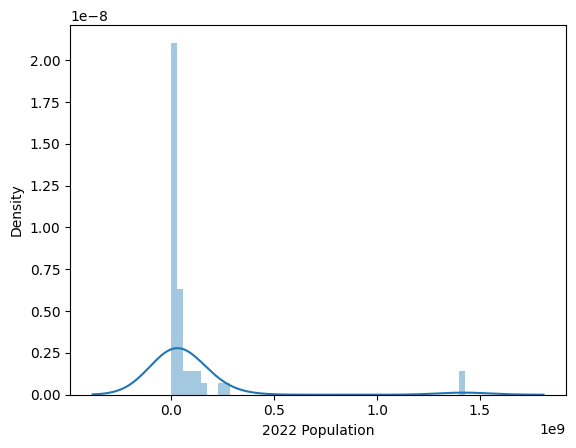

In [21]:
def plot_line(continent):
    SelectedData = NewWorldPopulationData[NewWorldPopulationData['Continent'] == continent]
    SelectedDataPopulation = SelectedData['2022 Population']
    # line chart
    sns.distplot(SelectedDataPopulation)

plot_line('Asia')


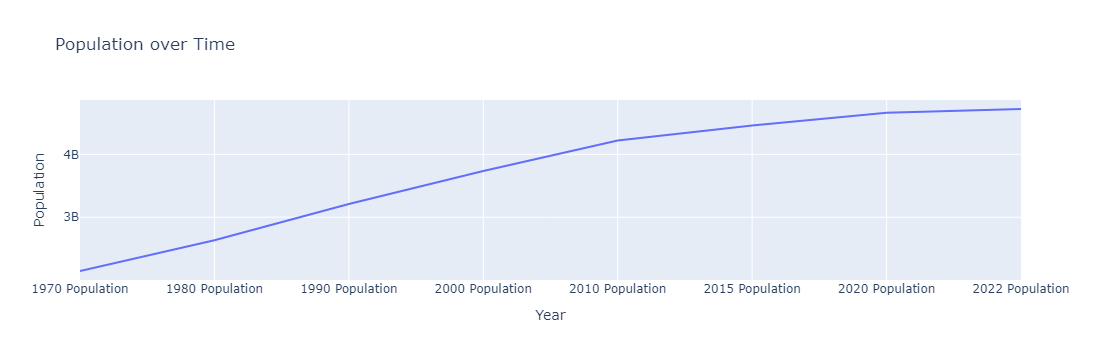

In [16]:
fig 

In [26]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


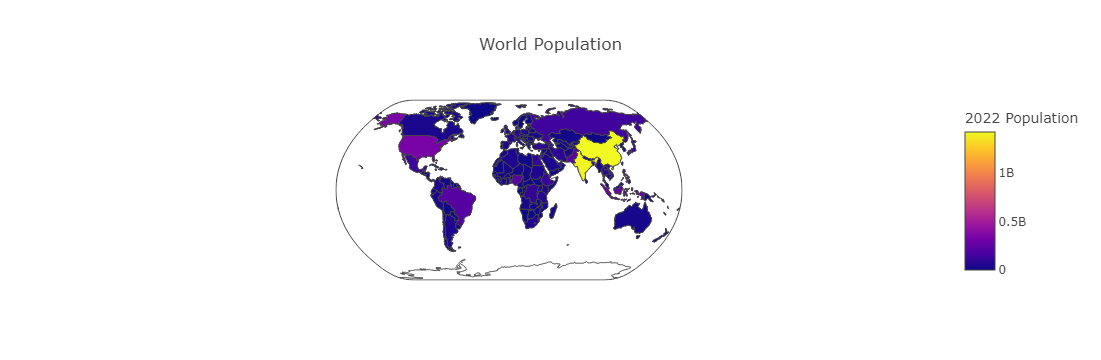

In [27]:
import plotly.express as px
import streamlit as st


# Create a choropleth map
fig = px.choropleth(df,
                    locations="CCA3",  # ISO 3166-1 alpha-3 codes
                    color="2022 Population",  # Data to be color-coded
                    hover_name="Country/Territory",  # Column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="natural earth",  # Map projection
                    title="World Population"
                   )

# Display in Streamlit

fig